In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('train.txt',delimiter=';')
df

,i didnt feel humiliated,sadness
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness
...,...,...
15994,i just had a very brief time in the beanbag an...,sadness
15995,i am now turning and i feel pathetic that i am...,sadness
15996,i feel strong and good overall,joy
15997,i feel like this was such a rude comment and i...,anger


In [7]:
df.rename(columns={'i didnt feel humiliated': 'Input', 'sadness': 'Emotion'}, inplace=True)

In [8]:
df.head()

,Input,Emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [9]:
df.shape

(15999, 2)

In [10]:
df.dtypes

Input      object
Emotion    object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Input    15999 non-null  object
 1   Emotion  15999 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [12]:
import seaborn as sns

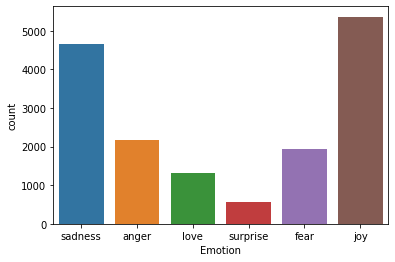

In [14]:
sns.countplot('Emotion',data=df)

In [15]:
df['Emotion']=df['Emotion'].replace({'sadness':0,'anger':1,'love':2,'surprise':3,'fear':4,'joy':5})

In [16]:
df.head()

,Input,Emotion
0,i can go from feeling so hopeless to so damned...,0
1,im grabbing a minute to post i feel greedy wrong,1
2,i am ever feeling nostalgic about the fireplac...,2
3,i am feeling grouchy,1
4,ive been feeling a little burdened lately wasn...,0


In [17]:
df.isnull().sum()

Input      0
Emotion    0
dtype: int64

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

import nltk
import re
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sameer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
voc_size=5000

In [24]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df['Input'])):
    emotion=re.sub('[^a-zA-Z]',' ',df['Input'][i])
    emotion=emotion.lower()
    emotion=emotion.split()
    emotion=[ps.stem(word) for word in emotion if not word in stopwords.words('english')]
    emotion=' '.join(emotion)
    corpus.append(emotion)

In [25]:
corpus

['go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant',
 'feel like make suffer see mean someth',
 'feel run divin experi expect type spiritu encount',
 'think easiest time year feel dissatisfi',
 'feel low energi thirsti',
 'immens sympathi gener point possibl proto writer tri find time write corner life sign agent let alon publish contract feel littl preciou',
 'feel reassur anxieti side',
 'didnt realli feel embarrass',
 'feel pretti pathet time',
 'start feel sentiment doll child began collect vintag barbi doll sixti',
 'feel compromis skeptic valu everi unit work put',
 'feel irrit reject without anyon anyth say anyth',


In [26]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[255, 3981, 1224, 4666, 218, 3806, 3816, 436, 1709],
 [1544, 4120, 2218, 3946, 3981, 512, 946],
 [4079, 3981, 4522, 2964, 4509, 4593, 2723],
 [3981, 722],
 [2734, 3981, 3121, 3187, 2472, 4160, 699],
 [2734,
  305,
  344,
  1305,
  996,
  4503,
  2734,
  1969,
  4294,
  4263,
  4814,
  2505,
  3981,
  925,
  3166],
 [3981, 2077, 1602, 2064, 163, 169, 3232, 2142],
 [1986, 169, 3981, 1986, 4831, 1154, 2558, 845, 665],
 [3981, 2925],
 [3981, 925, 4957, 2001, 2328, 4784, 3635],
 [3981, 1993, 3943, 2834, 2128, 4030, 3806, 3912],
 [2504, 4974, 1305, 169, 3981, 4095],
 [3981, 2516, 2681, 4585],
 [997,
  2188,
  4501,
  4580,
  1315,
  285,
  658,
  1298,
  3175,
  1305,
  4909,
  299,
  1602,
  561,
  1600,
  3576,
  1223,
  22,
  4778,
  3981,
  3121,
  4323],
 [3981, 1546, 3539, 4061],
 [1059, 3717, 3981, 289],
 [3981, 3889, 4812, 1305],
 [2722, 3981, 1073, 3835, 835, 2815, 1485, 178, 1294, 3835, 4123],
 [3981, 2834, 1769, 746, 238, 37, 3350, 388],
 [3981, 1548, 1019, 293, 556, 3734, 2035, 

In [27]:
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [28]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,  255, 3981, 1224,
       4666,  218, 3806, 3816,  436, 1709])

In [38]:
embedding_vector_features=40
model=Sequential()
from tensorflow.keras.layers import Dropout
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(200))
model.add(Dense(7,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 40)            200000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               192800    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1407      
Total params: 394,207
Trainable params: 394,207
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
import numpy as np

In [40]:
X_final=np.array(embedded_docs)

In [41]:
y_final=np.array(df.Emotion)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [44]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
175/175 [==============================] - 28s 159ms/step - loss: 1.5759 - accuracy: 0.3595 - val_loss: 1.4294 - val_accuracy: 0.4819
Epoch 2/10
175/175 [==============================] - 25s 142ms/step - loss: 1.1085 - accuracy: 0.6108 - val_loss: 0.8270 - val_accuracy: 0.7285
Epoch 3/10
175/175 [==============================] - 23s 133ms/step - loss: 0.6298 - accuracy: 0.7899 - val_loss: 0.5864 - val_accuracy: 0.7987
Epoch 4/10
175/175 [==============================] - 24s 135ms/step - loss: 0.4364 - accuracy: 0.8492 - val_loss: 0.4648 - val_accuracy: 0.8379
Epoch 5/10
175/175 [==============================] - 24s 135ms/step - loss: 0.3280 - accuracy: 0.8860 - val_loss: 0.4521 - val_accuracy: 0.8375
Epoch 6/10
175/175 [==============================] - 24s 139ms/step - loss: 0.2870 - accuracy: 0.8969 - val_loss: 0.4349 - val_accuracy: 0.8454
Epoch 7/10
175/175 [==============================] - 26s 149ms/step - loss: 0.2563 - accuracy: 0.9083 - val_loss: 0.4376 - val_ac

In [45]:
y_pred=np.argmax(model.predict(X_test), axis=-1)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.858125